In [12]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [3]:
df_fire_safety = pd.read_csv('matched_Fire_Safety_Complaints.csv')

In [7]:
df_fire_safety.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31459 entries, 0 to 31458
Data columns (total 26 columns):
Unnamed: 0                         31459 non-null int64
Complaint Id                       31459 non-null object
Complaint Number                   31459 non-null object
Complaint Item Type                31459 non-null object
Complaint Item Type Description    31457 non-null object
311 Case Number                    749 non-null float64
Inspection Number                  30404 non-null float64
Address                            31459 non-null object
Zipcode                            31355 non-null float64
Battalion                          31450 non-null object
Station Area                       31242 non-null object
Fire Prevention District           31446 non-null object
Received Date                      31459 non-null object
Entry Date                         31459 non-null object
Disposition                        29104 non-null object
Disposition Date                   2

In [10]:
df_fire_safety['Received Date']=pd.to_datetime(df_fire_safety['Received Date'])
df_fire_safety['Entry Date']=pd.to_datetime(df_fire_safety['Entry Date'])
df_fire_safety['Disposition Date']=pd.to_datetime(df_fire_safety['Disposition Date'])

In [11]:
df_fire_safety.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31459 entries, 0 to 31458
Data columns (total 26 columns):
Unnamed: 0                         31459 non-null int64
Complaint Id                       31459 non-null object
Complaint Number                   31459 non-null object
Complaint Item Type                31459 non-null object
Complaint Item Type Description    31457 non-null object
311 Case Number                    749 non-null float64
Inspection Number                  30404 non-null float64
Address                            31459 non-null object
Zipcode                            31355 non-null float64
Battalion                          31450 non-null object
Station Area                       31242 non-null object
Fire Prevention District           31446 non-null object
Received Date                      31459 non-null datetime64[ns]
Entry Date                         31459 non-null datetime64[ns]
Disposition                        29104 non-null object
Disposition Date    

In [17]:
df_fire_safety['Year_Received']= df_fire_safety['Received Date'].dt.year

In [30]:
plt.hist(df_fire_safety['Year_Received'],bins=10)

(array([ 4352.,  2583.,  2185.,  3107.,  2344.,  3822.,  1707.,  1589.,
         2955.,  6815.]),
 array([ 2005. ,  2006.2,  2007.4,  2008.6,  2009.8,  2011. ,  2012.2,
         2013.4,  2014.6,  2015.8,  2017. ]),
 <a list of 10 Patch objects>)

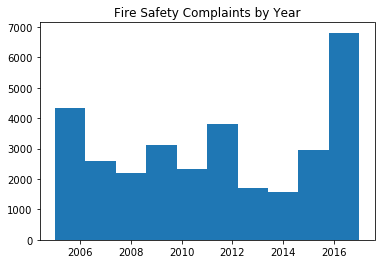

In [31]:
plt.title('Fire Safety Complaints by Year')
plt.show()

In [50]:
disposition = df_fire_safety[['Disposition','Complaint Number','Year_Received']].groupby(['Year_Received','Disposition']).count().reset_index()

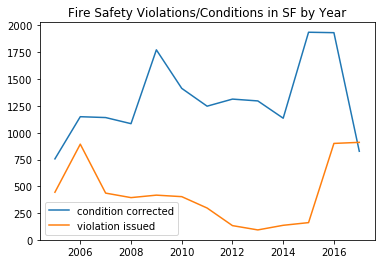

In [80]:
plt.plot(disposition[disposition['Disposition']=='condition corrected']['Year_Received'], disposition[disposition['Disposition']=='condition corrected']['Complaint Number'], label = 'condition corrected')
plt.plot(disposition[disposition['Disposition']=='violation issued']['Year_Received'], disposition[disposition['Disposition']=='violation issued']['Complaint Number'], label = 'violation issued')
plt.legend(loc='best')
plt.title('Fire Safety Violations/Conditions in SF by Year')
plt.show()

In [57]:
disposition['Disposition'].unique()

array(['condition corrected', 'no jurisdiction', 'no merit',
       'referred to another agency', 'referred to dbi', 'violation issued',
       'referred to dph', 'referred to pm inspection task force',
       'no access to building', 'duplicate complaint'], dtype=object)